<a href="https://colab.research.google.com/github/Deok-Hun/Aiffel_Kun/blob/master/EX_2_1_%EB%8B%B9%EB%87%A8%EB%B3%91_%EC%88%98%EC%B9%98%EB%A5%BC_%EB%A7%9E%EC%B6%B0%EB%B3%B4%EC%9E%90!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 가져오기

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
dia=load_diabetes()
print(dir(dia))

['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']


# 모델에 입력할 데이터 X,y  준비하기

In [6]:
df_X=dia.data
df_y=dia.target

print(df_X.shape, df_y.shape)

(442, 10) (442,)


In [7]:
type(df_X)

numpy.ndarray

In [8]:
import pandas as pd
dia_df=pd.DataFrame(data=df_X,columns=dia.feature_names)
dia_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [9]:
df_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [10]:
df_X.ndim

2

In [11]:
df_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [12]:
dia.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [13]:
import numpy as np
df_X=np.array(dia.data)

In [14]:
type(df_X)

numpy.ndarray

In [15]:
type(df_y)

numpy.ndarray

# train 데이터와 test 데이터로 분리하기

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X,df_y,test_size=0.2,random_state=43)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


# 모델 준비하기

In [17]:
W=np.random.rand(10)
b=np.random.rand()

In [19]:
import matplotlib.pyplot as plt

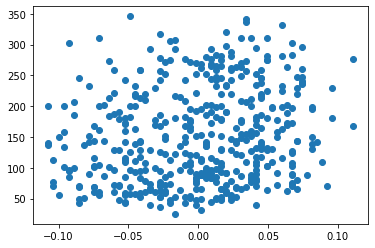

In [20]:
plt.scatter(df_X[:, 0], df_y)

plt.show()

In [21]:
def model(df_X,W,b):
  predictions = 0
  for i in range(10):
    predictions += df_X[:,i]*W[i]
  predictions += b
  return predictions

In [22]:
predictions=model(df_X,W,b)
predictions

array([0.64313676, 0.48149832, 0.61752676, 0.55253103, 0.56158986,
       0.3754408 , 0.47982794, 0.81476981, 0.62385265, 0.55010801,
       0.29345571, 0.60018678, 0.52504396, 0.65053002, 0.57111273,
       0.85567016, 0.69456614, 0.76247593, 0.46858054, 0.50486274,
       0.40921023, 0.50974697, 0.49726392, 0.78808804, 0.51966933,
       0.57317292, 0.31723887, 0.50685497, 0.43203725, 0.63813055,
       0.53773261, 0.37102275, 0.74129247, 0.49380838, 0.37049239,
       0.67886336, 0.64684419, 0.5007194 , 0.9279272 , 0.5919368 ,
       0.73902001, 0.29769691, 0.53369652, 0.51713453, 0.71604014,
       0.61968704, 0.44243898, 0.31704537, 0.59890167, 0.65688399,
       0.50232203, 0.62475791, 0.60241689, 0.62954034, 0.59088842,
       0.48161687, 0.53624482, 0.32763534, 0.61344139, 0.74171874,
       0.39708207, 0.57710444, 0.54507775, 0.49113174, 0.49703542,
       0.71344288, 0.60215714, 0.60709612, 0.54967096, 0.40252552,
       0.49820909, 0.73175289, 0.79334923, 0.69248469, 0.71459

# 손실함수 loss 정의하기

In [23]:
def MSE(a,b):
  mse = ((a-b)**2).mean()
  return mse

In [24]:
def loss(df_X,W,b,df_y):
  predictions=model(df_X,W,b)
  L=MSE(predictions,df_y)
  return L

# 기울기를 구하는 gradient 함수 구현하기

In [25]:
def gradient(df_X,W,b,df_y):
  N=len(W)
  y_pred=model(df_X,W,b)
  dW=1/N * 2 * df_X.T.dot(y_pred-df_y)

  db=2*(y_pred-df_y).mean()
  return dW,db

In [26]:
dW,db=gradient(df_X,W,b,df_y)
print("dW:",dW)
print("db:",db)

dW: [ -60.5888688   -13.71617148 -189.54713865 -142.58255032  -68.21570046
  -55.95288244  127.66048498 -138.97675804 -182.83329771 -123.53481942]
db: -303.05876258135083


# 하이퍼 파라미터인 합습률 설정하기

In [27]:
LEARNING_RATE = 0.0001

# 모델 학습하기

In [28]:
losses=[]
for i in range(1,20001):
  dW,db=gradient(X_train,W,b,y_train)
  W-=LEARNING_RATE * dW
  b-=LEARNING_RATE * db
  L=loss(X_train,W,b,y_train)
  losses.append(L)
  if i % 50 == 0 :
    print('Iteration %d: Loss %0.4f' %(i,L))

Iteration 50: Loss 28430.6170
Iteration 100: Loss 27970.3797
Iteration 150: Loss 27519.0865
Iteration 200: Loss 27076.5612
Iteration 250: Loss 26642.6310
Iteration 300: Loss 26217.1266
Iteration 350: Loss 25799.8818
Iteration 400: Loss 25390.7340
Iteration 450: Loss 24989.5236
Iteration 500: Loss 24596.0942
Iteration 550: Loss 24210.2927
Iteration 600: Loss 23831.9686
Iteration 650: Loss 23460.9749
Iteration 700: Loss 23097.1670
Iteration 750: Loss 22740.4036
Iteration 800: Loss 22390.5458
Iteration 850: Loss 22047.4578
Iteration 900: Loss 21711.0062
Iteration 950: Loss 21381.0604
Iteration 1000: Loss 21057.4924
Iteration 1050: Loss 20740.1767
Iteration 1100: Loss 20428.9901
Iteration 1150: Loss 20123.8120
Iteration 1200: Loss 19824.5244
Iteration 1250: Loss 19531.0112
Iteration 1300: Loss 19243.1589
Iteration 1350: Loss 18960.8561
Iteration 1400: Loss 18683.9936
Iteration 1450: Loss 18412.4646
Iteration 1500: Loss 18146.1640
Iteration 1550: Loss 17884.9891
Iteration 1600: Loss 17628.8

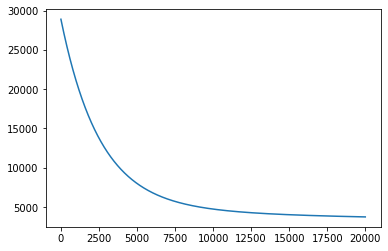

In [29]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [30]:
W, b

(array([  25.31145992,  -20.86399703,  210.84873739,  117.76280274,
          39.98083463,   23.45875911, -124.64204995,  124.46709141,
         190.76071646,   93.79193809]), 149.54682792941978)

# test 데이터에 대한 성능 확인하기

In [31]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

3536.2779148986183

# 정답 데이터와 예측한 데이터 시각화하기

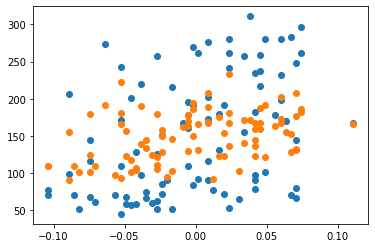

In [32]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

# 선형 회귀모델로 구현해보기

In [33]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

In [34]:
model.fit(X_train,y_train)

LinearRegression()

In [36]:
predictions=model.predict(X_test)
predictions

array([111.74351759,  98.41335251, 168.36373195, 255.05882934,
       168.43764643, 117.60982186, 198.86966323, 126.28961941,
       117.73121787, 224.83346984,  60.89446471, 217.77318707,
       122.38400957, 159.62260803, 122.74123621, 185.04460275,
       152.54609708, 204.3940595 , 182.10182243, 146.63883543,
       173.32949408,  91.71073024, 188.6730776 , 232.28910312,
       106.6959319 , 123.63724014, 217.56844485,  90.32278409,
        63.09200708, 177.66922231, 179.8393172 ,  67.39484859,
       154.06891508,  84.98202686, 185.29820945, 133.83614896,
       107.16738986,  92.16721388,  72.56422882, 118.37655858,
       188.69078991, 180.356482  ,  62.1428293 , 167.59600837,
       281.99256615, 124.88039588,  69.45906833, 284.42667095,
        62.26215385, 116.9182166 , 210.89814168, 217.90132382,
       194.09034022,  78.49649362,  99.86248797, 172.95429134,
        91.41761366, 155.19644573, 223.11869737, 279.068125  ,
       226.97053726, 177.40948876, 125.58869725, 132.02

In [38]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

2858.2551533228366

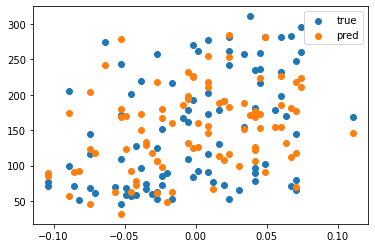

In [39]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()